In [ ]:
# 라이브러리 설정
from tensorflow import keras
from sklearn.model_selection import train_test_split



In [23]:

(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

In [24]:
# 딥러닝 모델시작
model = keras.Sequential()

# 신경망 1층 
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape =(28, 28, 1)))
model.add(keras.layers.MaxPooling2D(2))

# 신경망 2층
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape =(28, 28, 1)))
model.add(keras.layers.MaxPooling2D(2))

# 1차원 정리
model.add(keras.layers.Conv2D(63, kernel_size = 3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

# DROPOUT, 과적합 방지
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation= 'softmax'))

# 딥러닝 모델 확인
model.summary()



Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 7, 7, 63)          18207     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 3, 3, 63)        

In [25]:
keras.utils.plot_model(model, show_shapes=True, to_file='cnn.png', dpi=300)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [28]:
# 모델컴파일과 훈련하기
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best_cnn_model.h5', save_best_only=True)

early_point_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=10, batch_size = 30, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_point_cb])



Epoch 1/10
1600/1600 [==============================] - 34s 21ms/step - loss: 0.3805 - accuracy: 0.8642 - val_loss: 0.3075 - val_accuracy: 0.8862
Epoch 2/10
1600/1600 [==============================] - 33s 21ms/step - loss: 0.3290 - accuracy: 0.8804 - val_loss: 0.2934 - val_accuracy: 0.8896
Epoch 3/10
1600/1600 [==============================] - 33s 20ms/step - loss: 0.2953 - accuracy: 0.8939 - val_loss: 0.2673 - val_accuracy: 0.9016
Epoch 4/10
1600/1600 [==============================] - 33s 20ms/step - loss: 0.2706 - accuracy: 0.9019 - val_loss: 0.2517 - val_accuracy: 0.9062
Epoch 5/10
1600/1600 [==============================] - 33s 20ms/step - loss: 0.2563 - accuracy: 0.9074 - val_loss: 0.2436 - val_accuracy: 0.9113
Epoch 6/10
1600/1600 [==============================] - 33s 21ms/step - loss: 0.2343 - accuracy: 0.9143 - val_loss: 0.2498 - val_accuracy: 0.9087
Epoch 7/10
1600/1600 [==============================] - 33s 20ms/step - loss: 0.2239 - accuracy: 0.9178 - val_loss: 0.2461 -

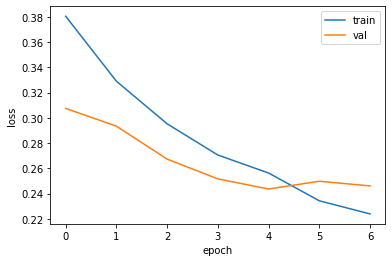

375/375 [==============================] - 3s 8ms/step - loss: 0.2436 - accuracy: 0.9113


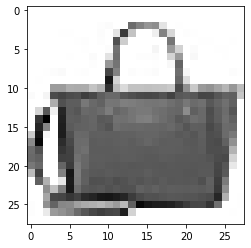

In [33]:
# CNN 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 모델평가
model.evaluate(val_scaled, val_target)

# 모델 시각화
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

[[2.1342981e-13 1.5083082e-21 3.9005341e-17 2.2933369e-18 4.6941926e-14
  5.4108743e-17 3.8502401e-14 1.2329383e-15 1.0000000e+00 5.7368211e-17]]


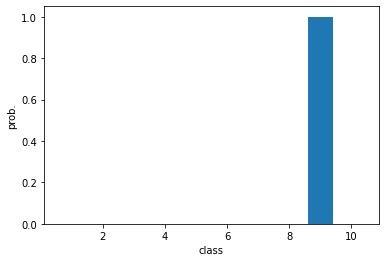

In [35]:
# 모델 예측치
predict = model.predict(val_scaled[0:1])
print(predict)

# 모델 시각화
plt.bar(range(1,11), predict[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [36]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방','앵클부츠']

import numpy as np
print(classes[np.argmax(predict)])

test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

model.evaluate(test_scaled, test_target)

가방
313/313 [==============================] - 3s 9ms/step - loss: 0.2527 - accuracy: 0.9087


[0.25274857878685, 0.9086999893188477]